### Ejercicios estadística descriptiva

Importaciones necesarias

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy.stats import shapiro, kstest

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.float_format', '{:.2f}'.format) # para poder visualizar los floats sólo con 2 decimales

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Abrimos el archivo df con el que trabajaremos
df = pd.read_csv('files/world_data_full_apply_nulos.csv' , index_col = 0)

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

- Media
- Mediana
- Desviación estándar
- Mínimo
- Máximo

In [3]:
df_num = df.select_dtypes(include = np.number)

In [4]:
# También podríamos emplear el método describe aparecen varias unidades estadísticas, incluidas las que se solicitan en el ejercicio
df_num.describe().T

# Sin embargo, mostramos sólo aquellas medidas estadísticas solicitadas:
df_num.agg(['mean' , 'median' , 'std' , 'min' , 'max']).T

,mean,median,std,min,max
density,134.50,83.00,157.31,1.26,847.00
agricultural_land,39.12,39.60,21.78,0.60,82.60
land_area,255.21,148.46,258.39,0.00,964.00
armed_forces_size,103.78,28.50,167.16,0.00,936.00
birth_rate,20.21,17.95,9.95,5.90,46.08
calling_code,360.55,255.50,323.24,1.00,1876.00
co2-emissions,125.92,34.48,181.79,1.02,727.97
cpi,144.19,124.74,54.78,99.03,550.93
cpi_change,6.72,2.30,24.45,-4.30,254.90
fertility_rate,2.70,2.25,1.28,0.98,6.91


- Conclusiones: 
    - Observamos que hay algunas variables en las que la media y la mediana son muy distintas entre sí (density, armed_forces_size, co2-emissions, gdp...), lo que sugiere que los datos pueden estar bastante dispersos. Es en estas variables donde el mínimo y el máximo están también más alejados entre sí (extremos). También se atisban desviaciones típicas de mayor recorrido en estos casos.
    - Por el contrario, las variables cuya media y mediana son más cercanas (agricultural_land, birth_rate, gasoline_price...) nos sugieren que los datos no están tan dispersos ni tienen tantos outliers como en el caso anterior. También observamos que sus mínimos-máximos no difieren por tanto y, por ende, su desviación típica también es menor.

2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [5]:
df_max = df.groupby('country')['density'].max().sort_values(ascending = False).reset_index()
max_den = df_max.loc[0 , 'country']

print(f"El país con la menor densidad de población es: {max_den}")

df_min = df.groupby('country')['population'].min().sort_values(ascending = True).reset_index()
min_pob = df_min.loc[0 , 'country']

print(f"El país con la menor población es: {min_pob}")

El país con la menor densidad de población es: Palestinian National Authority
El país con la menor población es: Nauru


In [6]:
# Hemos encontrado un método alternativo para hacerlo: Como al utilizar directamente el .max() no podíamos sacar el dato, empleamos .idxmax()
max_den2 = df.loc[df['density'].idxmax(), 'country']
print(f"El país con la menor densidad de población es: {max_den2}")

min_pob2 = df.loc[df['population'].idxmin(), 'country']
print(f"El país con la menor población es: {min_pob2}")

El país con la menor densidad de población es: Palestinian National Authority
El país con la menor población es: Nauru


- Conclusiones: Al aplicar ambos métodos observamos que el país con mayor densidad de población es Palestinian National Authority y el país con menor cantidad de población es Nauru.

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [7]:
df_nat = df.groupby('country')['birth_rate'].mean().sort_values(ascending = True).reset_index()
df_nat.dropna(subset=['birth_rate'] , inplace=True) # quitamos los NaN para poder ver sólo aquellos países con resultados
df_nat

,country,birth_rate
0,Monaco,5.90
1,South Korea,6.40
2,San Marino,6.80
3,Andorra,7.20
4,Italy,7.30
...,...,...
184,Democratic Republic of the Congo,41.18
185,Mali,41.54
186,Somalia,41.75
187,Chad,42.17


- Conclusiones: A raíz de los datos observados, vemos que Monaco, South Korea y San Marino tienen una tasa de natalidad baja (menor de 7) en comparación a Somalia, Chad y Niger (mayor de 40). Teniendo en cuenta que la media total era de 20, vemos que los datos están algo alejados.

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [8]:
# Calcular el percentil 25, 50 (mediana) y 75 de los datos
percentil_25 = np.percentile(df['infant_mortality'].dropna(), 25)
mediana = np.percentile(df['infant_mortality'].dropna(), 50)
percentil_75 = np.percentile(df['infant_mortality'].dropna(), 75)

print(f"El Q1 es {percentil_25}, el Q2 es {mediana} y el Q3 es {percentil_75}")

df_mort = df.loc[: , ['country' , 'infant_mortality']] 

# Definir una función para asignar la clasificación de edades
def clasificar_mortalidad (dato):
    
    if dato < percentil_25:
        return 'baja'
    
    elif dato <= percentil_75:
        return 'moderada'
    
    else:
        return 'alta'

df_mort['clasificacion'] = df_mort['infant_mortality'].apply(clasificar_mortalidad)
display(df_mort)

El Q1 es 6.0, el Q2 es 14.0 y el Q3 es 32.7


,country,infant_mortality,clasificacion
0,Afghanistan,47.90,alta
1,Albania,7.80,moderada
2,Algeria,20.10,moderada
3,Andorra,2.70,baja
4,Angola,51.60,alta
...,...,...,...
190,Venezuela,21.40,moderada
191,Vietnam,16.50,moderada
192,Yemen,42.90,alta
193,Zambia,40.40,alta


- Conclusiones:
    - Hemos considerado utilizar los percentiles como método de referencia para asignar una clasificación a esa mortalidad infantil, siendo:
        - Baja: Entendemos como 'baja' aquellos valores que están incluidos en el primer percentil
        - Moderada: Se ha asignado 'moderada' a aquellos valores que están comprendidos en la 'caja' principal, es decir: del segundo al tercer percentil
        - Alta: Finalmente, establecimos como 'alta' los del cuarto percentil

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [9]:
df_correlaciones = df[['fertility_rate' , 'life_expectancy']].corr(method = "spearman")

df_correlaciones

,fertility_rate,life_expectancy
fertility_rate,1.00,-0.84
life_expectancy,-0.84,1.00


- Conclusiones: Observando los resultados, vemos que existe una correlación negativa fuerte entre ambas variables que nos sugiere que cuando aumenta la tasa de fertilidad, disminuye la esperanza de vida

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de precios al consumidor.

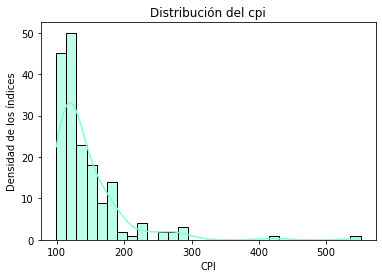

In [10]:
sns.histplot(data=df, 
             x='cpi', 
             kde=True, 
             color='aquamarine')

plt.xlabel("CPI")
plt.ylabel("Densidad de los índices")
plt.title("Distribución del cpi");

- Conclusiones: Observamos que hay una segmentación de los datos hacia la derecha, lo cual parece indicar que existen valores atípicos extremos. Es decir: Mientras que el grueso de nuestros datos se mueve en índices alrededor de 100-140, hay algunos países con una alta capacidad de adquisición de la cesta de la compra (bienes y servicios) respecto a los demás (índices >500)

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [11]:
df['difference'] = df['gdp'] - df['co2-emissions']

pais_mayor_diferencia = df.loc[df['difference'].idxmax()]

print("El país con la mayor diferencia entre GDP y CO2 emissions es:", pais_mayor_diferencia['country'])
print("La diferencia es de:", pais_mayor_diferencia['difference'])

El país con la mayor diferencia entre GDP y CO2 emissions es: Germany
La diferencia es de: 3845630030096.027


- Conclusiones: Apreciamos que Germany ha demostrado ser capaz de mantener un PIB considerablemente alto mientras reduce las emisiones de CO2 en comparación con otros países. Esto sugiere un enfoque eficiente en el crecimiento económico y la reducción de la huella de carbono.

8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [12]:
porcentaje_promedio = df['population_labor_force_participation'].mean()


print("El porcentaje promedio de participación en la fuerza laboral para todos los países es:", porcentaje_promedio)

El porcentaje promedio de participación en la fuerza laboral para todos los países es: 62.73806818181817


- Conclusiones: Observamos que el hecho de que el promedio sea alrededor del 62.74% sugiere que una proporción considerable de la población en los países representados en el DataFrame está activamente involucrada en la fuerza laboral. 

9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [27]:
df_filtrado = df.select_dtypes(include=['number'])

df_correlaciones = df_filtrado.corr(method = "spearman")

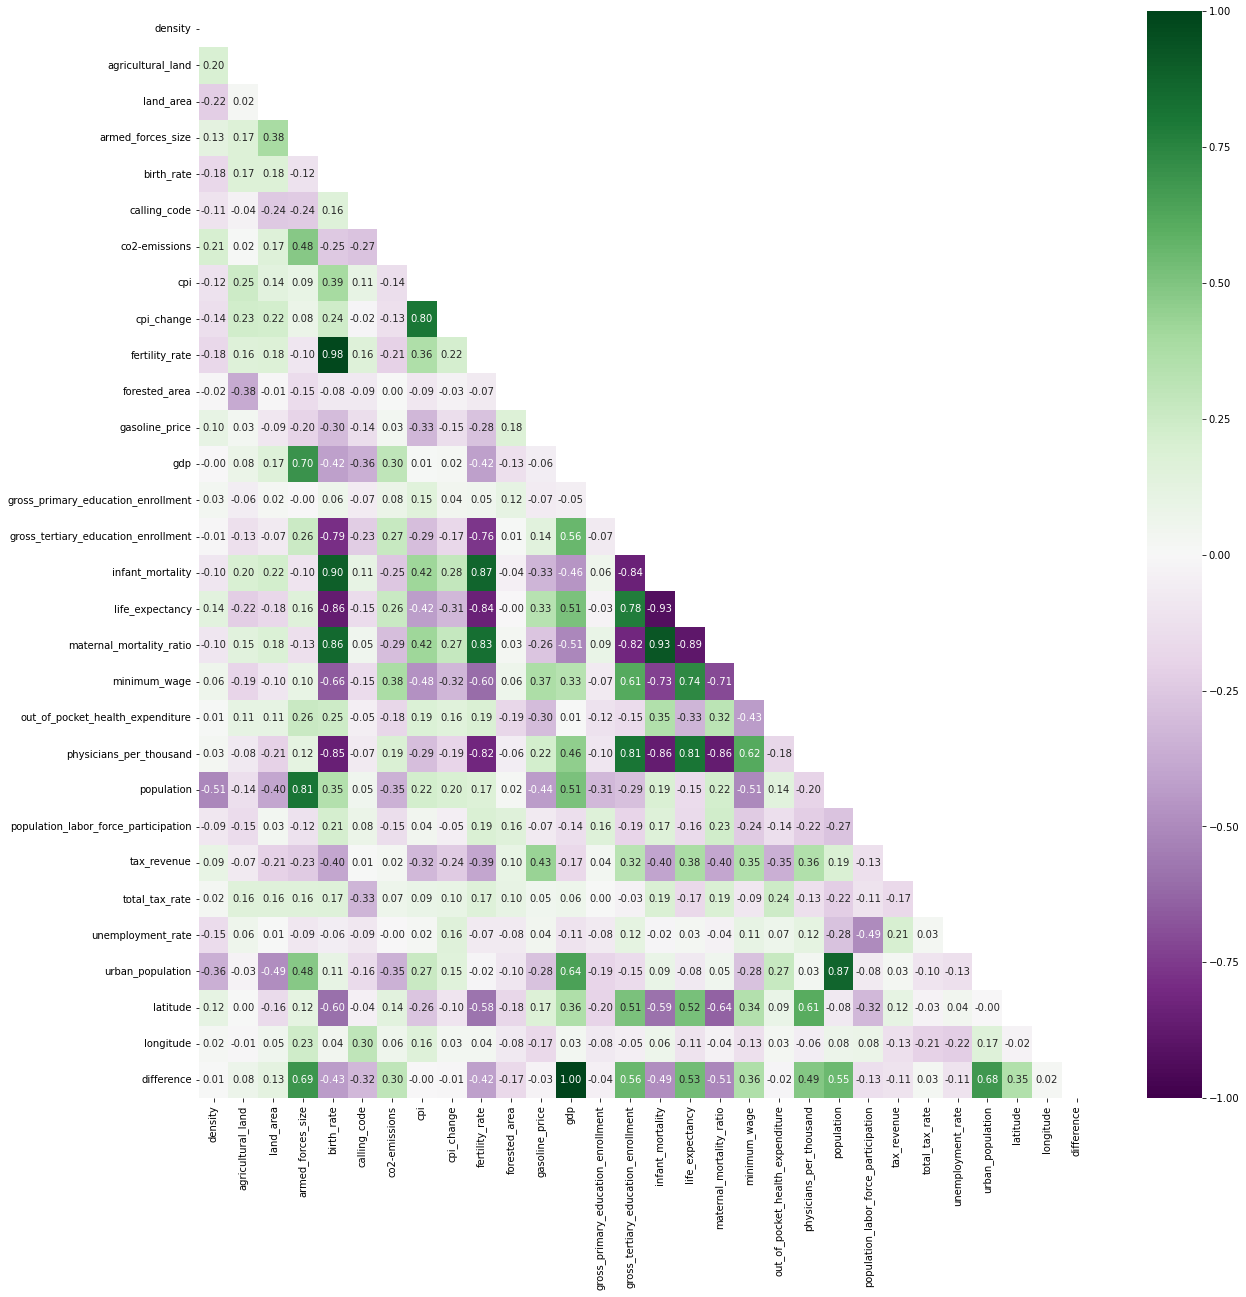

In [28]:
plt.figure(figsize = (20, 20))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "PRGn", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 


- Conclusiones: En base al heatmap obtenido, observamos lo siguiente:
    - Existe una correlación **fuerte** (>= 0.7) **positiva** (si aumenta una variable, aumenta la otra) entre:
        - fertility_rate y birth_rate
        - cpi_change y cpi
        - gdp y armed_forces_size
        - infant_mortality y birth_rate
        - infant_mortality y fertility_rate
        - life_expectancy y gross_tertiary_education_enrollment
        - maternal_mortality_ratio y birth_rate
        - maternal_mortality_ratio y fertility_rate
        - maternal_mortality_ratio y infant_mortality
        - minimum_wage y life_expectancy
        - physicians_per_thousand y life_expectancy
        - physicians_per_thousand y gross_tertiary_education_enrollment
        - population y armed_forces_size
        - urban_population y population
        - difference y gdp
    - Existe una correlación **fuerte** (>= 0.7) **negativa** (si aumenta una variable, disminuye la otra) entre:
        - gross_tertiary_education_enrollment y birth_rate
        - gross_tertiary_education_enrollment y fertility_rate
        - gross_tertiary_education_enrollment y infant_mortality
        - life_expectancy y birth_rate
        - life_expectancy y fertility_rate 
        - life_expectancy y infant_mortality
        - maternal_mortality_ratio y gross_tertiary_education_enrollment
        - maternal_mortality_ratio y life_expectancy
        - minimum_wage y infant_mortality
        - minimum_wage y maternal_mortality_ratio
        - physicians_per_thousand y birth_rate
        - physicians_per_thousand y fertility_rate
        - physicians_per_thousand y infant_mortality
        - physicians_per_thousand y maternal_mortality_ratio